<a href="https://colab.research.google.com/github/Isamaoz/CE888---Data-Science-and-Decision-Making/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv',error_bad_lines=False)
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [4]:
samples = np.empty((20,len(data)))
samples_mean = np.empty((20))
for x in range(20):
  samples[x] = np.random.choice(data, size = len(data))
  samples[x] = np.sort(samples[x])
  samples_mean[x] = np.mean(samples[x])
data_mean = np.mean(samples)
print(samples)
print(samples_mean)
print(data_mean)

[[ 2.  2.  2.  7.  8.  8.  8.  9.  9. 10. 13. 13. 20. 20.]
 [ 2.  4.  5.  8.  8.  8.  9.  9. 10. 10. 13. 13. 20. 20.]
 [ 2.  2.  2.  4.  4.  5.  7.  8.  8.  9. 10. 10. 20. 20.]
 [ 2.  2.  2.  7.  8.  9. 10. 10. 10. 10. 10. 10. 13. 20.]
 [ 2.  4.  4.  5.  7.  8. 10. 10. 10. 13. 20. 20. 22. 22.]
 [ 2.  2.  2.  2.  4.  5.  9.  9. 10. 10. 10. 10. 13. 20.]
 [ 4.  4.  8.  8.  8.  8.  8.  9.  9.  9. 10. 10. 20. 20.]
 [ 2.  2.  5.  5.  7.  7.  7.  7.  7.  8.  9.  9. 10. 10.]
 [ 2.  4.  7.  8.  8.  8.  8.  8.  8.  9.  9.  9. 13. 13.]
 [ 2.  4.  4.  8.  8.  9.  9.  9. 10. 10. 10. 10. 10. 22.]
 [ 2.  2.  2.  5.  8.  8.  8.  9.  9.  9. 10. 10. 20. 22.]
 [ 2.  2.  4.  4.  5.  5.  5.  7.  8.  8.  8.  9. 20. 22.]
 [ 2.  2.  4.  4.  5.  7.  8.  8.  9.  9.  9. 13. 13. 22.]
 [ 2.  7.  7.  7.  7.  8.  8.  9. 10. 13. 13. 13. 20. 22.]
 [ 5.  5.  7.  8.  8.  8.  8.  9.  9.  9.  9. 10. 10. 22.]
 [ 4.  4.  5.  8.  8.  9.  9.  9.  9. 10. 10. 10. 13. 20.]
 [ 2.  2.  2.  7.  8.  9. 10. 10. 10. 20. 22. 22. 22. 22

In [5]:
lower = np.percentile(samples_mean, 2.5)
upper = np.percentile(samples_mean, 97.5)
print(lower)
print(upper)

7.226785714285714
11.626785714285713


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
  samples = np.empty((n_iterations,sample_size))
  samples_mean = np.empty((n_iterations))
  for x in range(n_iterations):
    samples[x] = np.random.choice(sample, size = sample_size)
    samples[x] = np.sort(samples[x])
    samples_mean[x] = np.mean(samples[x])
  data_mean = np.mean(samples)
  lower = np.percentile(samples_mean, 2.5)
  upper = np.percentile(samples_mean, 97.5)
  return data_mean, lower, upper

(0, 100000)

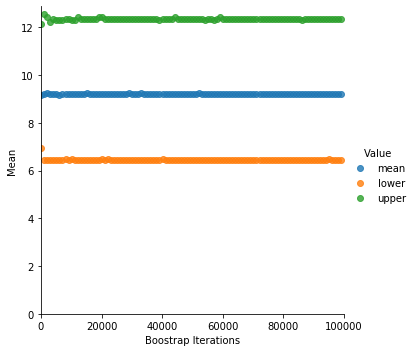

In [9]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	# <---INSERT YOUR CODE HERE--->
  samples = np.empty((n_iterations,sample_size))
  samples_mean = np.empty((n_iterations))
  for x in range(n_iterations):
    samples[x] = np.random.choice(sample, size = sample_size)
    samples[x] = np.sort(samples[x])
    samples_mean[x] = np.mean(samples[x])
  data_mean = np.mean(samples)
  lower = np.percentile(samples_mean, (100-ci)/2)
  upper = np.percentile(samples_mean, (ci+(100-ci))/2)
  return data_mean, lower, upper

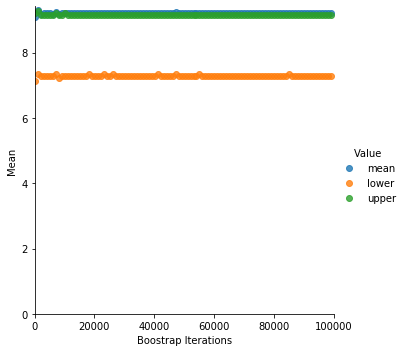

In [16]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

#Vehicles Dataset


In [27]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
vh = pd.read_csv('vehicles.csv',error_bad_lines=False)
print(vh)
dataV = vh.values
print(dataV)
# Note: you can add more cells as needed to organise your code and your plots

     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]
[[18. 24.]
 [15. 27.]
 [18. 27.]
 [16. 25.]
 [17. 31.]
 [15. 35.]
 [14. 24.]
 [14. 19.]
 [14. 28.]
 [15. 23.]
 [15. 27.]
 [14. 20.]
 [15. 22.]
 [14. 18.]
 [22. 20.]
 [18. 31.]
 [21. 32.]
 [21. 31.]
 [10. 32.]
 [10. 24.]
 [11. 26.]
 [ 9. 29.]
 [28. 24.]
 [25. 24.]
 [19. 33.]
 [16. 33.]
 [17. 32.]
 [19. 28.]
 [18. 19.]
 [14. 32.]
 [14. 34.]
 [14. 26.]
 [14. 30.]
 [12. 22.]
 [13. 22.]
 [13. 33.]
 [18. 39.]
 [22. 36.]
 [19. 28.]
 [18. 27.]
 [23. 21.]
 [26. 24.]
 [25. 30.]
 [20. 34.]
 [21. 32.]
 [13. 38.]
 [14. 37.]
 [15. 30.]
 [14. 31.]
 [17. 37.]
 [11. 32.]
 [13. 47.]
 [12. 41.]
 [13. 45.]
 [15. 34.]
 [13. 33.]


In [0]:
current_fleet = dataV[:,0]
new_fleet = dataV[:,1]
new_fleet = new_fleet[np.logical_not(np.isnan(new_fleet))]

In [0]:
import seaborn as sns

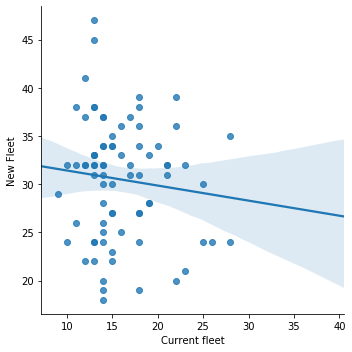

In [33]:
sns.lmplot(vh.columns[0],vh.columns[1], data=vh)

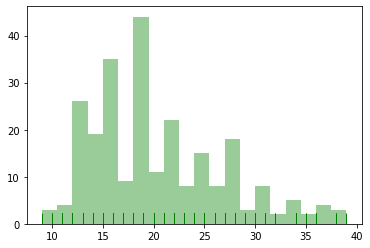

In [63]:
#Histogram of current fleet
sns.distplot(current_fleet, bins=20,kde=False, rug=True, color=["g"])

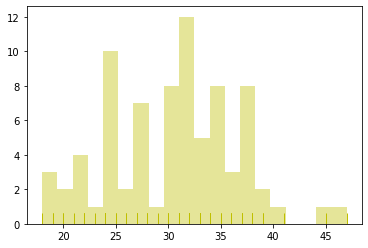

In [64]:
#Histogram of new fleet
sns.distplot(new_fleet, bins=20,kde=False, rug=True, color=["y"])

In [57]:
cur_mean, cur_lower , cur_upper= boostrap_mean_ci(current_fleet, current_fleet.shape[0], i, 90)
print(cur_mean)
print(cur_lower)
print(cur_upper)

20.143042888000032
19.481927710843372
20.136546184738958


In [99]:
new_mean, new_lower , new_upper= boostrap_mean_ci(new_fleet, new_fleet.shape[0], 20000, 90)
print(new_mean)
print(new_lower)
print(new_upper)

30.485410126582277
29.341772151898734
30.481012658227847


In [86]:
tobs = np.mean(new_fleet) - np.mean(current_fleet)
print(tobs)

10.336434344974837


In [72]:
#H0: There is not an improvement in the current fleet
concatenate = np.concatenate((current_fleet,new_fleet))
print(concatenate)
print(concatenate.shape)

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 36. 25. 38. 26. 22. 36. 27. 27. 32

In [93]:
perm = np.random.permutation(concatenate)
print(perm)

[27. 28. 39. 27. 18. 13. 15. 19. 32. 12. 19. 34. 16. 10. 18. 35. 19. 35.
 26. 28. 47. 34. 24. 37. 32. 16. 19. 28. 14. 32. 29. 21. 13. 26. 13. 24.
 11. 26. 24. 22. 26. 16. 15. 28. 14. 18. 13. 20. 20. 15. 18. 14. 29. 34.
 13. 23. 13. 33. 31. 13. 16. 19. 14. 34. 34. 38. 21. 18. 13. 21. 11. 16.
 22. 18. 19. 26. 34. 24. 36. 15. 13. 14. 33. 22. 14. 22. 36. 18. 18. 24.
 21. 19. 37. 24. 29. 13. 34. 25. 32. 17. 16. 24. 21. 15. 31. 21. 31. 16.
 19. 36. 15. 15. 32. 28. 18. 13. 15. 16. 11. 14. 39. 21. 23. 30. 17. 25.
 22. 22. 19. 27. 19. 18. 14. 24. 21. 27. 15. 14. 20. 18. 14. 14. 21. 18.
 30. 14. 28. 18. 27. 31. 31. 32. 16. 22. 27. 38. 36. 11. 25. 20. 34. 18.
 31. 18. 25. 36. 18. 21. 15. 22. 33. 13. 16. 16. 14. 35.  9. 17. 14. 19.
 24. 13. 15. 27. 34. 30. 30. 28. 38. 23. 38. 25. 19. 27. 14. 19. 23. 31.
 25. 15. 20. 19. 13. 32. 10. 27. 15. 26. 18. 14. 23. 16. 15. 13. 24. 25.
 32. 17. 38. 45. 16. 20. 12. 19. 14. 22. 32. 21. 31. 31. 12. 30. 20. 13.
 37. 16. 32. 16. 38. 27. 28. 17. 17. 25. 16. 18. 23

In [97]:
pold = perm[0:int(len(perm)/2)]
pnew = perm[int(len(perm)/2):]
print(pold)
print(pnew)

[15. 36. 25. 34. 19. 35. 34. 27. 32. 33. 24. 18. 20. 19. 45. 28. 21. 17.
 13. 22. 35. 14. 13. 16. 20. 20. 36. 19. 14. 27. 22. 36. 18. 18. 12. 14.
 35. 26. 12. 28. 24. 15. 24. 28. 20. 13. 14. 22. 27. 28. 19. 27. 11. 16.
 13. 26. 24. 31. 23. 30. 23. 23. 31. 27. 18. 20. 26. 15. 28. 21. 12. 25.
 18. 21. 23. 14. 19. 30. 21. 26. 15. 18. 19. 26. 28. 21. 15. 25. 18. 13.
 16. 21. 24. 39. 38. 32. 32. 13. 16. 13. 26. 29. 19. 16. 15. 24. 29.  9.
 18. 15. 36. 17. 16. 24. 31. 13. 18. 20. 18. 12. 21. 22. 16. 15. 37. 24.
 37. 14. 19. 27. 17. 26. 17. 13. 25. 18. 15. 20. 18. 24. 17. 34. 21. 37.
 25. 21. 19. 14. 32. 13. 25. 38. 27. 15. 11. 33. 34. 27. 34. 15. 23. 10.
 22. 21.]
[31. 34. 19. 19. 31. 30. 20. 19. 10. 25. 34. 23. 14. 16. 28. 13. 22. 19.
 14. 36. 32. 24. 15. 18. 17. 32. 29. 22. 11. 31. 47. 13. 30. 36. 31. 34.
 22. 21. 32. 20. 14. 13. 13. 18. 19. 32. 15. 36. 17. 20. 27. 21. 16. 27.
 14. 17. 30. 18. 38. 13. 12. 16. 32. 24. 13. 14. 21. 16. 24. 14. 18. 20.
 16. 13. 33. 16. 16. 19. 29. 16. 23. 14. 

In [98]:
print(np.mean(pnew))
print(np.mean(pold))
tperm = np.mean(pnew) - np.mean(pold)
print(tperm)

22.902439024390244
22.365853658536587
0.5365853658536572


In [0]:
counter = 0
if tperm > tobs:
  counter +=1


In [0]:
def permutation_test(set_a,set_b,no_perm):
  concatenate = np.concatenate((set_a,set_b))
  for x in range(no_perm):
    perm = np.random.permutation(concatenate)
    pold = perm[0:int(len(perm)/2)]
    pnew = perm[int(len(perm)/2):]
    tperm = np.mean(pnew) - np.mean(pold)
    counter = 0
    if tperm > tobs:
      counter +=1
  print(counter)
  pvalue = counter/no_perm
  print(pvalue)
  return pvalue

In [105]:
pvalue_test=permutation_test([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0],[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
0, 1, 1, 1, 1, 1, 1, 1],20000)
print(pvalue_test)

0
0.0
0.0


In [0]:
#Can reject the null hypothesis?